In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [3]:
'''loading data'''
path=os.getcwd()
df=pd.read_excel(path+'\\datasource.xlsx',sheet_name='特殊图形',parse_dates=True)
display('df')

,时间,应收账款,应收账款1,应收账款2,label,label2
0,年1,3,2.250466,1.788540,label-1,label2-0
1,年2,5,4.813567,4.787028,label-0,label2-1
2,年3,4,3.684472,3.112352,label-0,label2-4
3,年4,6,5.912718,5.559088,label-0,label2-4
4,年5,4,3.387270,3.152384,label-1,label2-2
5,年6,3,2.222527,1.918280,label-1,label2-0
6,年7,4,3.359632,2.422747,label-1,label2-4
7,年8,4,3.927416,3.418884,label-0,label2-3
8,年9,3,2.750360,1.985718,label-0,label2-3
9,年10,2,1.388322,1.143956,label-0,label2-3


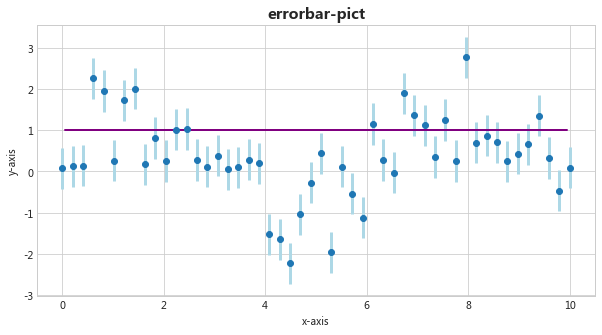

In [85]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
'''making data'''
x=np.linspace(0,10,50) #0至10 均分为50个数
dy=0.8
y=np.sin(x)+dy*np.random.randn(50) #np.random.randn从均值0方差1的正态分布中抽取数据
'''picts plot'''
fig=plt.figure(figsize=(10,5))
plt.errorbar(x,y,yerr=0.5,fmt='o',ecolor='lightblue',elinewidth=3,capsize=0)
plt.axhline(y=1,xmin=0.05,xmax=0.95,linestyle='-', linewidth=2,color='purple')
# plt.plot(np.linspace(-5,15,100),np.ones(100),'-',color='purple') #绘制直线
#设定x轴与y轴标签
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#对整体图像设置标题
plt.title('errorbar-pict',fontsize=15,fontweight='bold')
#保存图片 
plt.savefig('errorbar.png',bbox_inches='tight')

In [78]:
?plt.axhline

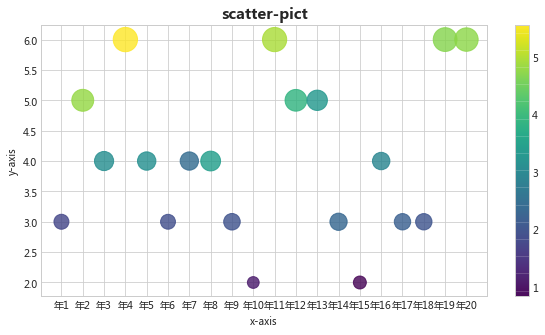

In [200]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
'''picts plot'''
fig=plt.figure(figsize=(10,5))
plt.scatter(df['时间'],df['应收账款'],
            s=df['应收账款1']*100,alpha=0.8,
            c=df['应收账款2'],cmap='viridis')
plt.colorbar()
#设定x轴与y轴标签
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#对整体图像设置标题
plt.title('scatter-pict',fontsize=15,fontweight='bold')
#保存图片 
plt.savefig('scatter.png',bbox_inches='tight')

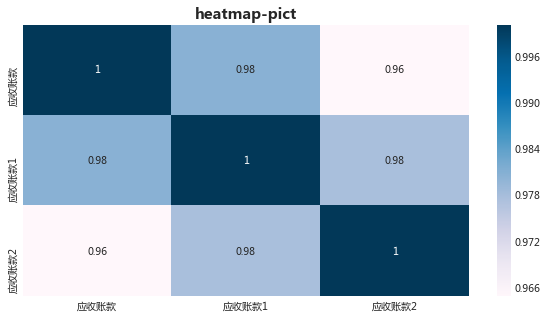

In [213]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''create correlationship matrix'''
corr=df.corr()
display('corr')
'''heatmap'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap="PuBu")
#对整体图像设置标题
plt.title('heatmap-pict',fontsize=15,fontweight='bold')
#保存图片 
plt.savefig('heatmap.png',bbox_inches='tight')

Text(0.5, 1.0, 'volin-pict')

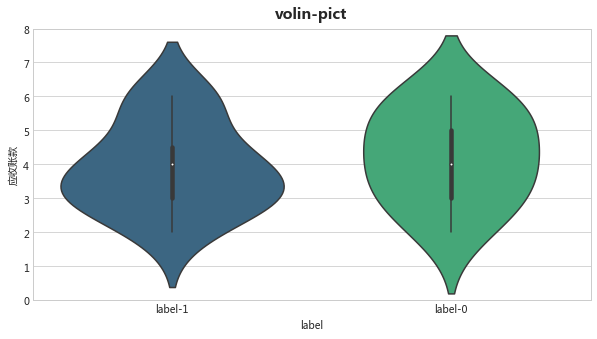

In [231]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''violinplot'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
sns.violinplot('label','应收账款',data=df,palette="viridis")
plt.ylim(0,df['应收账款'].max()+2)
#对整体图像设置标题
plt.title('volin-pict',fontsize=15,fontweight='bold',pad=10)


Text(0.5, 1.0, 'boxplot-pict')

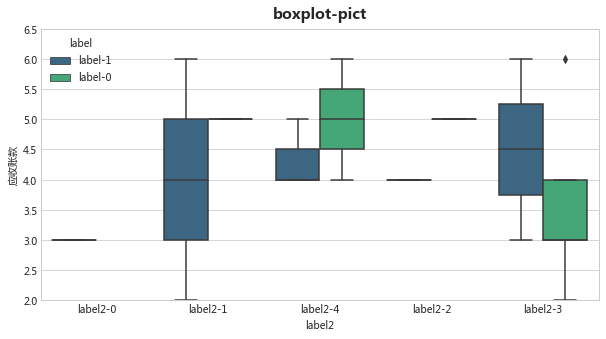

In [225]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''factorplot'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
sns.boxplot(x='label2',y='应收账款',hue='label',data=df,palette="viridis")
plt.ylim(df['应收账款'].min(),df['应收账款'].max()+0.5)
# plt.legend(fontsize=10,bbox_to_anchor=(1, 1))

#对整体图像设置标题
plt.title('boxplot-pict',fontsize=15,fontweight='bold',pad=10)

<Figure size 720x360 with 0 Axes>

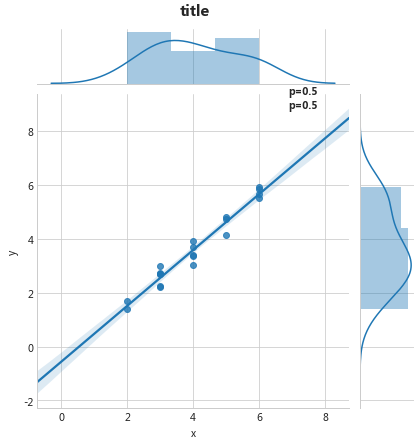

In [295]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''factorplot'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
g=(sns.jointplot(x='应收账款',y='应收账款1',data=df,kind='reg')
     .set_axis_labels("x", "y"))
#对整体图像设置标题
plt.text(0.4,0.94,'p=0.5\np=0.5',fontsize=10, fontweight='bold',transform=fig.transFigure)
plt.text(0.25,1.2,'title',fontsize=15, fontweight='bold',transform=fig.transFigure)
#保存图片 
plt.savefig('jointplot.png',bbox_inches='tight')

In [263]:
?plt.text

([], <a list of 0 Text yticklabel objects>)

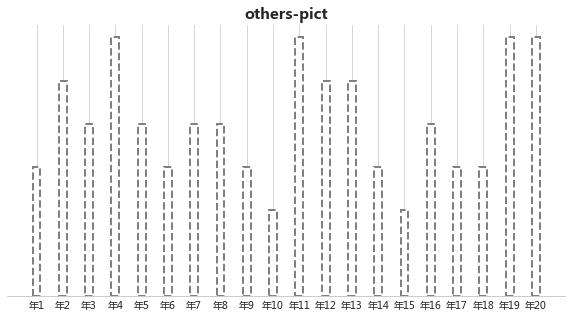

In [175]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False


'''去除坐标系'''
fig=plt.figure(figsize=(10,5))
#设置空白矩形
plt.bar(df['时间'],df['应收账款'],width=0.3,
        ls='--', lw=2, edgecolor='gray', color='white')
#对整体图像设置标题
plt.title('others-pict',fontsize=15,fontweight='bold')

#去除坐标轴
plt.gca().spines['left'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
#去除网格
# plt.grid(color='white')
plt.grid(axis='y')
#去除xy轴的标注
# plt.xticks([])
plt.yticks([])

Text(-0.1, 4, 'aa')

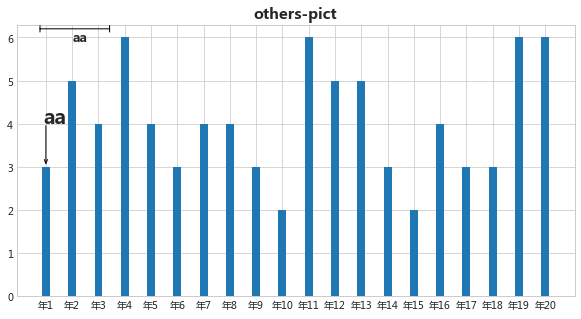

In [176]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False


'''添加图表注释 '''
fig=plt.figure(figsize=(10,5))
#设置空白矩形
plt.bar(df['时间'],df['应收账款'],width=0.3,)
#对整体图像设置标题
plt.title('others-pict',fontsize=15,fontweight='bold')

# 添加分段线
plt.annotate('',
             xy=(df.index.min()-0.3, df['应收账款'].max()+0.2),
             xycoords='data',
             xytext=(df.index[2]+0.5 , df['应收账款'].max()+0.2),
             textcoords='data',
             size=8, ha='right', va='center',
             arrowprops=dict(arrowstyle='|-|,widthA=0.4,widthB=0.4')
             )
plt.text(df.index[1] , df['应收账款'].max()-0.1,'aa',fontsize=13, fontweight='bold')
# 添加箭头注释以及调整文字注释大小
plt.annotate('',
             xy=(df.index[0], df['应收账款'][0]),
             xycoords='data',
             xytext=(df.index[0] , df['应收账款'][0]+1),
             textcoords='data',
             size=8, ha='right', va='center',
             arrowprops=dict(arrowstyle='->,head_length=0.5,head_width=0.2')
             )
plt.text(df.index[0]-0.1 , df['应收账款'][0]+1,'aa',fontsize=20, fontweight='bold')


Text(0.5, 1.0, 'others-pict')

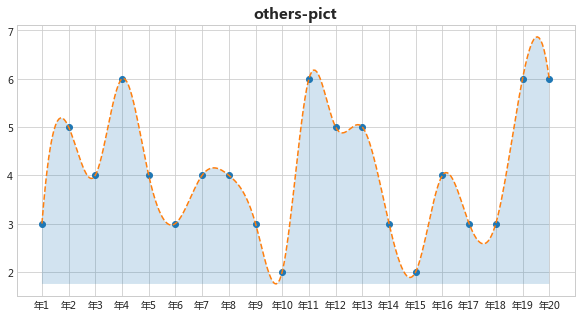

In [177]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False
from scipy.interpolate import interp1d

'''绘制平滑曲线 '''
fig=plt.figure(figsize=(10,5))
#计算差值
x_new=np.linspace(df.index.min(), df.index.max(), 300)
y_new=interp1d(df.index, df['应收账款'], kind='cubic')
# 绘制平滑图形
plt.plot(df['时间'],df['应收账款'],'o')
plt.plot(x_new,y_new(x_new),'--')
plt.fill_between(x_new,y_new(x_new).min(),y_new(x_new),alpha=0.2)

#对整体图像设置标题
plt.title('others-pict',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'others-pict')

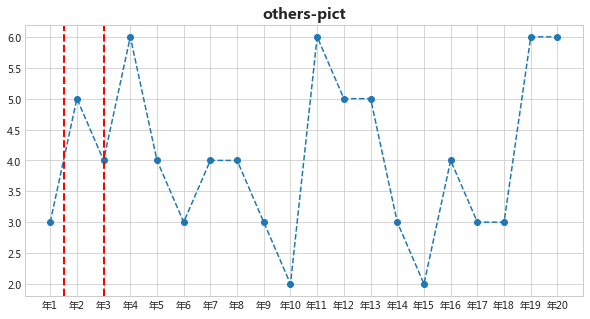

In [178]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''添加分段线 '''
fig=plt.figure(figsize=(10,5))
plt.plot(df['时间'],df['应收账款'],'o--')
plt.axvline(df.index[1]-0.5, ymin=0, ymax=df['应收账款'].max(),linestyle='--', linewidth=2,color='r')
plt.axvline(df.index[2], ymin=0, ymax=df['应收账款'].max(),linestyle='--', linewidth=2,color='r')
#对整体图像设置标题
plt.title('others-pict',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'scatter-pict')

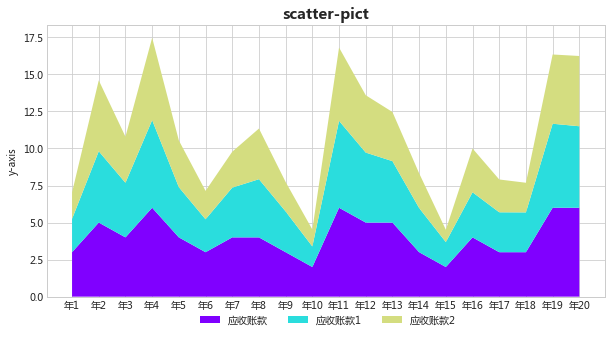

In [36]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''picts plot'''
fig=plt.figure(figsize=(10,5))
plt.stackplot(df['时间'],df['应收账款'],df['应收账款1'],df['应收账款2'],
             labels=['应收账款','应收账款1','应收账款2'],
             colors=cm.rainbow(np.arange(3)/3))
plt.legend(fontsize=10,ncol=3,bbox_to_anchor=(0.75, -0.03))
#设定x轴与y轴标签
# plt.xlabel('x-axis')
plt.ylabel('y-axis')
#对整体图像设置标题
plt.title('stack-pict',fontsize=15,fontweight='bold')


Text(0.5, 1, 'regression-pict')

<Figure size 720x360 with 0 Axes>

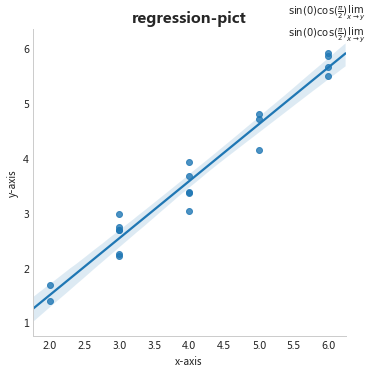

In [69]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''picts plot'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
g=(sns.lmplot(x='应收账款',y='应收账款1',data=df)
     .set_axis_labels("x", "y"))
plt.text(0.4,1,r'$ \sin(0)\cos(\frac{\pi}{2})\lim_{x\rightarrow y} $',
         fontsize=10, fontweight='bold',transform=fig.transFigure)
plt.text(0.4,0.94,r'$ \sin(0)\cos(\frac{\pi}{2})\lim_{x\rightarrow y} $',
         fontsize=10, fontweight='bold',transform=fig.transFigure)
#设定x轴与y轴标签
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(color='white')
#对整体图像设置标题
plt.title('regression-pict',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'density-pict')

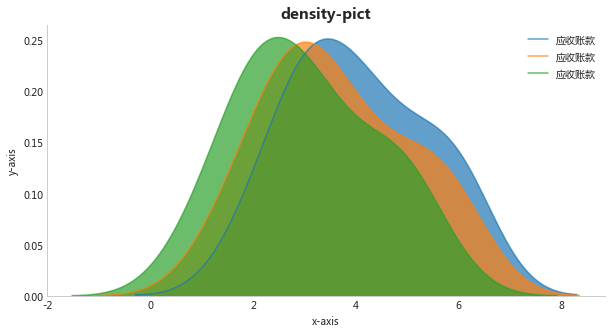

In [54]:
'''setting parameters'''
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''picts plot'''
import seaborn as sns
fig=plt.figure(figsize=(10,5))
sns.kdeplot(df['应收账款'],shade=True,alpha=0.7,label='应收账款')
sns.kdeplot(df['应收账款1'],shade=True,alpha=0.7,label='应收账款')
sns.kdeplot(df['应收账款2'],shade=True,alpha=0.7,label='应收账款')
#设定x轴与y轴标签
plt.xlabel('x-axis')
plt.ylabel('y-axis')
#去除坐标轴
plt.gca().spines['top'].set_color('none')
plt.gca().spines['right'].set_color('none')
#去除网格
plt.grid(color='white')
#对整体图像设置标题
plt.title('density-pict',fontsize=15,fontweight='bold')